In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
from time import time
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from keras.layers import *
from keras.models import Sequential

In [2]:
df = pd.read_csv('./diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<Axes: >

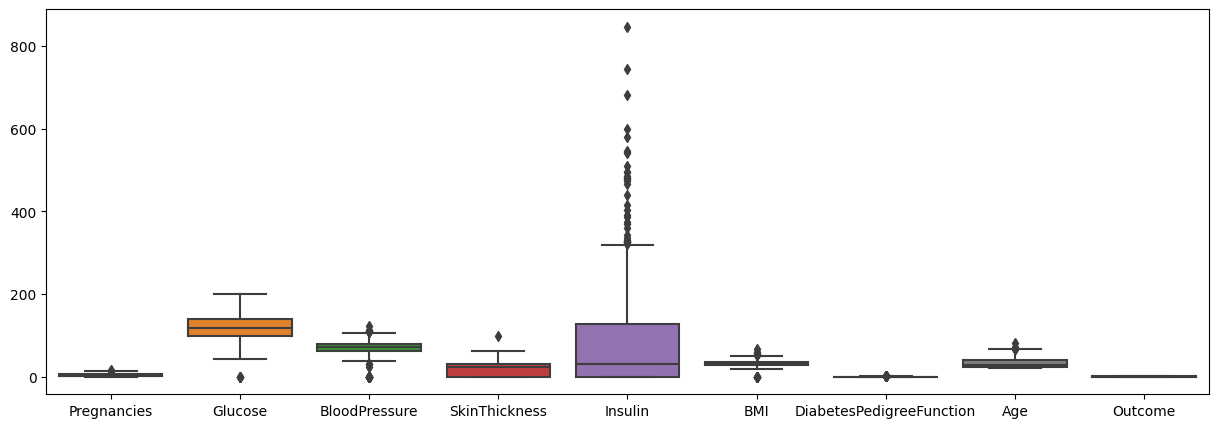

In [9]:
plt.figure(figsize=(15,5))
sns.boxplot(df)

In [10]:
df.shape

(768, 9)

In [11]:
df_wo = df.drop(df[df["Pregnancies"] > 14].index)
df_wo = df.drop(df[df["Glucose"] < 50].index)
df_wo = df.drop(df[df["BloodPressure"] > 120].index)
df_wo = df.drop(df[df["SkinThickness"] > 80].index)
df_wo = df.drop(df[df["Insulin"] > 600].index)
df_wo = df.drop(df[df["BMI"] > 55].index)
df_wo = df.drop(df[df["DiabetesPedigreeFunction"] > 2].index)
df_wo = df.drop(df[df["Age"] > 70].index)

In [12]:
df_wo.shape

(766, 9)

<Axes: >

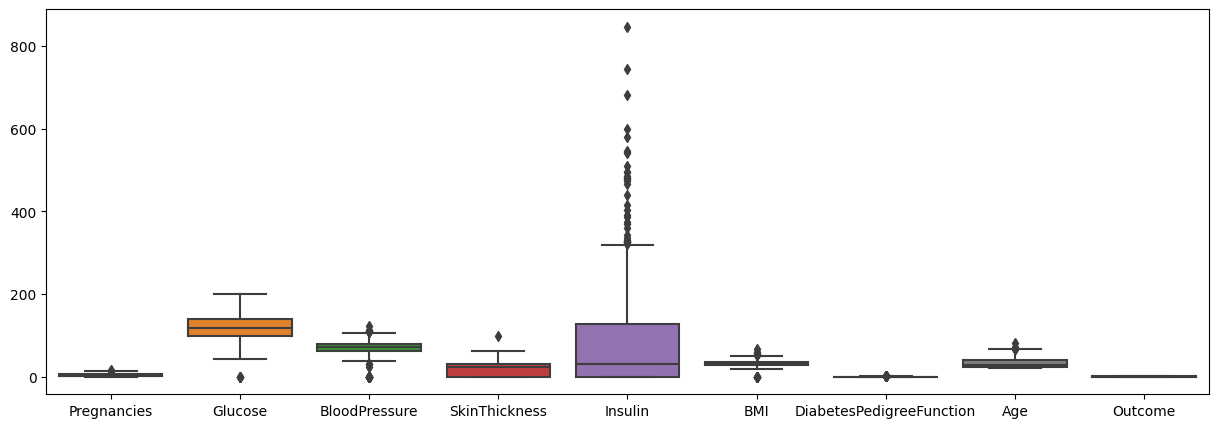

In [13]:
plt.figure(figsize=(15,5))
sns.boxplot(df)

In [14]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [15]:
X_train, X_test, y_train,y_test = train_test_split(X,y,random_state=42,train_size=0.7)
X_test,X_val,y_test,y_val = train_test_split(X_test,y_test,random_state=42,train_size=0.5)

In [16]:
def plot_history(history):
    tr_acc = history.history['accuracy']
    tr_loss = history.history['loss']
    val_acc = history.history['val_accuracy']
    val_loss = history.history['val_loss']
    index_loss = np.argmin(val_loss)
    val_lowest = val_loss[index_loss]
    index_acc = np.argmax(val_acc)
    acc_highest = val_acc[index_acc]
    Epochs = [i+1 for i in range(len(tr_acc))]
    loss_label = f'best epoch= {str(index_loss + 1)}'
    acc_label = f'best epoch= {str(index_acc + 1)}'
    
    plt.figure(figsize= (20, 8))
    plt.style.use('fivethirtyeight')
    plt.subplot(1, 2, 1)
    plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
    plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
    plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
    plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
    plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.tight_layout
    
    plt.show()

In [17]:
model = Sequential()
input = Input(shape=(8,))
model.add(input)
model.add(Dense(12, activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 12)                  │             108 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │             104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 221 (884.00 B)

 Trainable params: 221 (884.00 B)

 Non-trainable params: 0 (0.00 B)

In [19]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train,y_train,epochs=100,batch_size=8, validation_data=(X_val, y_val))

Epoch 1/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.3415 - loss: 18.2071 - val_accuracy: 0.3707 - val_loss: 4.0882
Epoch 2/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3891 - loss: 3.1345 - val_accuracy: 0.4310 - val_loss: 1.7195
Epoch 3/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4726 - loss: 1.3664 - val_accuracy: 0.6034 - val_loss: 0.9698
Epoch 4/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6128 - loss: 0.7605 - val_accuracy: 0.5948 - val_loss: 0.8489
Epoch 5/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6194 - loss: 0.7248 - val_accuracy: 0.5431 - val_loss: 0.7959
Epoch 6/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6187 - loss: 0.6505 - val_accuracy: 0.5948 - val_loss: 0.7618
Epoch 7/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6452 - loss: 0.6249 - val_accuracy: 0.5603 - val_loss: 0.7479
Epoch 8/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6584 - loss: 0.6265 - val_accuracy: 0.6207 -

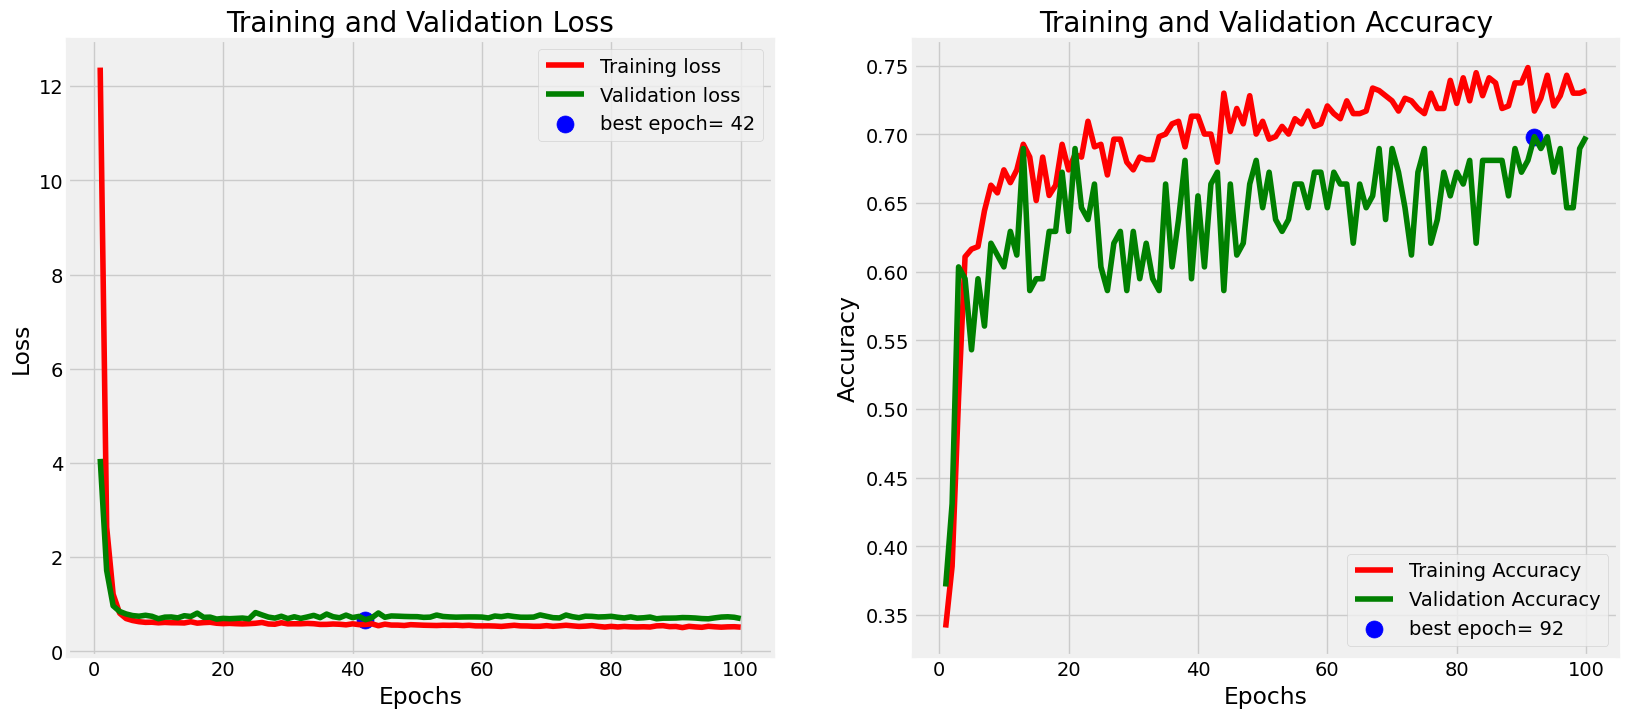

In [20]:
plot_history(history)

In [21]:
y_pred = model.predict(X_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


In [22]:
y_pred = np.round(y_pred)

In [23]:
print(f"Accuracy: {np.round(accuracy_score(y_test,y_pred)*100,2)}%")

Accuracy: 72.17%


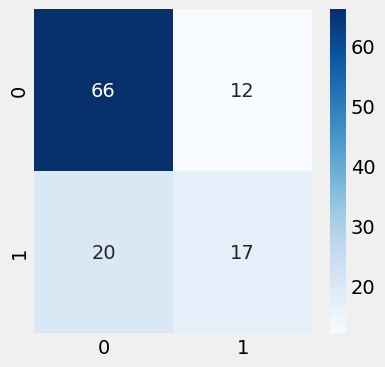

In [24]:
plt.figure(figsize=(4,4))
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, cmap='Blues')
plt.show()

In [25]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.85      0.80        78
           1       0.59      0.46      0.52        37

    accuracy                           0.72       115
   macro avg       0.68      0.65      0.66       115
weighted avg       0.71      0.72      0.71       115



In [26]:
model.save("model.h5")

In [28]:
model1 = tf.keras.models.load_model("model.h5")

In [30]:
y_pred = model.predict(X_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step  


In [33]:
y_pred = np.round(y_pred)

In [34]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.85      0.80        78
           1       0.59      0.46      0.52        37

    accuracy                           0.72       115
   macro avg       0.68      0.65      0.66       115
weighted avg       0.71      0.72      0.71       115



In [77]:
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)
X_val_s = scaler.transform(X_val)

In [78]:
model = Sequential()
input = Input(shape=(8,))
model.add(input)
model.add(Dense(12, activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_27 (Dense)                     │ (None, 12)                  │             108 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 8)                   │             104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 221 (884.00 B)

 Trainable params: 221 (884.00 B)

 Non-trainable params: 0 (0.00 B)

In [79]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train_s,y_train,epochs=100,batch_size=8, validation_data=(X_val_s, y_val))

Epoch 1/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6109 - loss: 0.6747 - val_accuracy: 0.6897 - val_loss: 0.6303
Epoch 2/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6728 - loss: 0.5930 - val_accuracy: 0.7241 - val_loss: 0.5822
Epoch 3/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6995 - loss: 0.5650 - val_accuracy: 0.7328 - val_loss: 0.5498
Epoch 4/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7414 - loss: 0.5079 - val_accuracy: 0.7586 - val_loss: 0.5329
Epoch 5/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7942 - loss: 0.4882 - val_accuracy: 0.7500 - val_loss: 0.5182
Epoch 6/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7606 - loss: 0.4786 - val_accuracy: 0.7845 - val_loss: 0.5089
Epoch 7/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7720 - loss: 0.4662 - val_accuracy: 0.7845 - val_loss: 0.5058
Epoch 8/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8112 - loss: 0.4334 - val_accuracy: 0.7845 - v

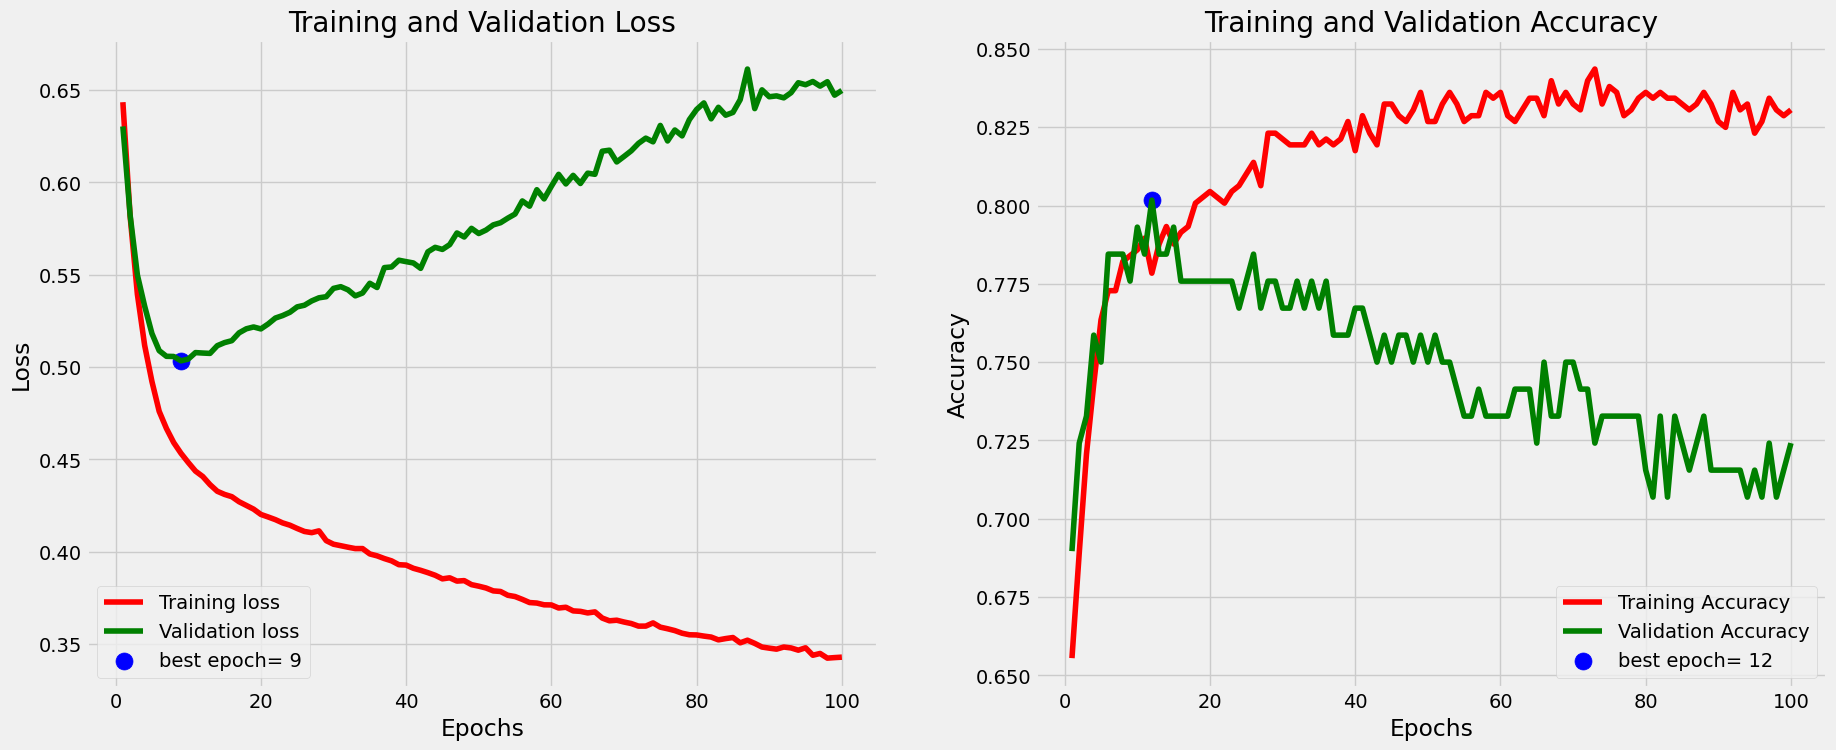

In [80]:
plot_history(history)

In [81]:
y_pred = model.predict(X_test_s)
y_pred = np.round(y_pred)
print(f"Accuracy: {np.round(accuracy_score(y_test,y_pred)*100,2)}%")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Accuracy: 75.65%


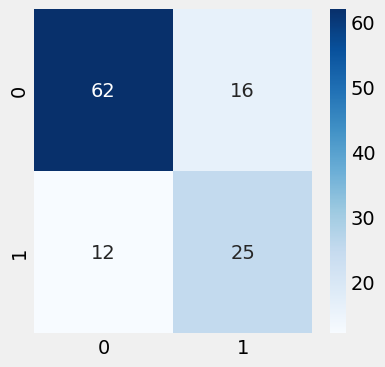

In [82]:
plt.figure(figsize=(4,4))
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, cmap='Blues')
plt.show()

In [83]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.79      0.82        78
           1       0.61      0.68      0.64        37

    accuracy                           0.76       115
   macro avg       0.72      0.74      0.73       115
weighted avg       0.76      0.76      0.76       115



In [84]:
aky_relu_layer = LeakyReLU(negative_slope=0.1)

In [85]:
model = Sequential()
input = Input(shape=(8,))
model.add(input)
model.add(Dense(12, activation=aky_relu_layer))
model.add(Dense(8,activation=aky_relu_layer))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_30 (Dense)                     │ (None, 12)                  │             108 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 8)                   │             104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 221 (884.00 B)

 Trainable params: 221 (884.00 B)

 Non-trainable params: 0 (0.00 B)

In [86]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train_s,y_train,epochs=100,batch_size=8, validation_data=(X_val_s, y_val))

Epoch 1/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6307 - loss: 0.6832 - val_accuracy: 0.6638 - val_loss: 0.6682
Epoch 2/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6999 - loss: 0.6363 - val_accuracy: 0.6810 - val_loss: 0.6363
Epoch 3/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7111 - loss: 0.5992 - val_accuracy: 0.6983 - val_loss: 0.6032
Epoch 4/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7245 - loss: 0.5753 - val_accuracy: 0.6810 - val_loss: 0.5741
Epoch 5/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7318 - loss: 0.5376 - val_accuracy: 0.6983 - val_loss: 0.5546
Epoch 6/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7638 - loss: 0.4977 - val_accuracy: 0.7414 - val_loss: 0.5408
Epoch 7/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7853 - loss: 0.4693 - val_accuracy: 0.7500 - val_loss: 0.5296
Epoch 8/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8132 - loss: 0.4550 - val_accuracy: 0.7759 - v

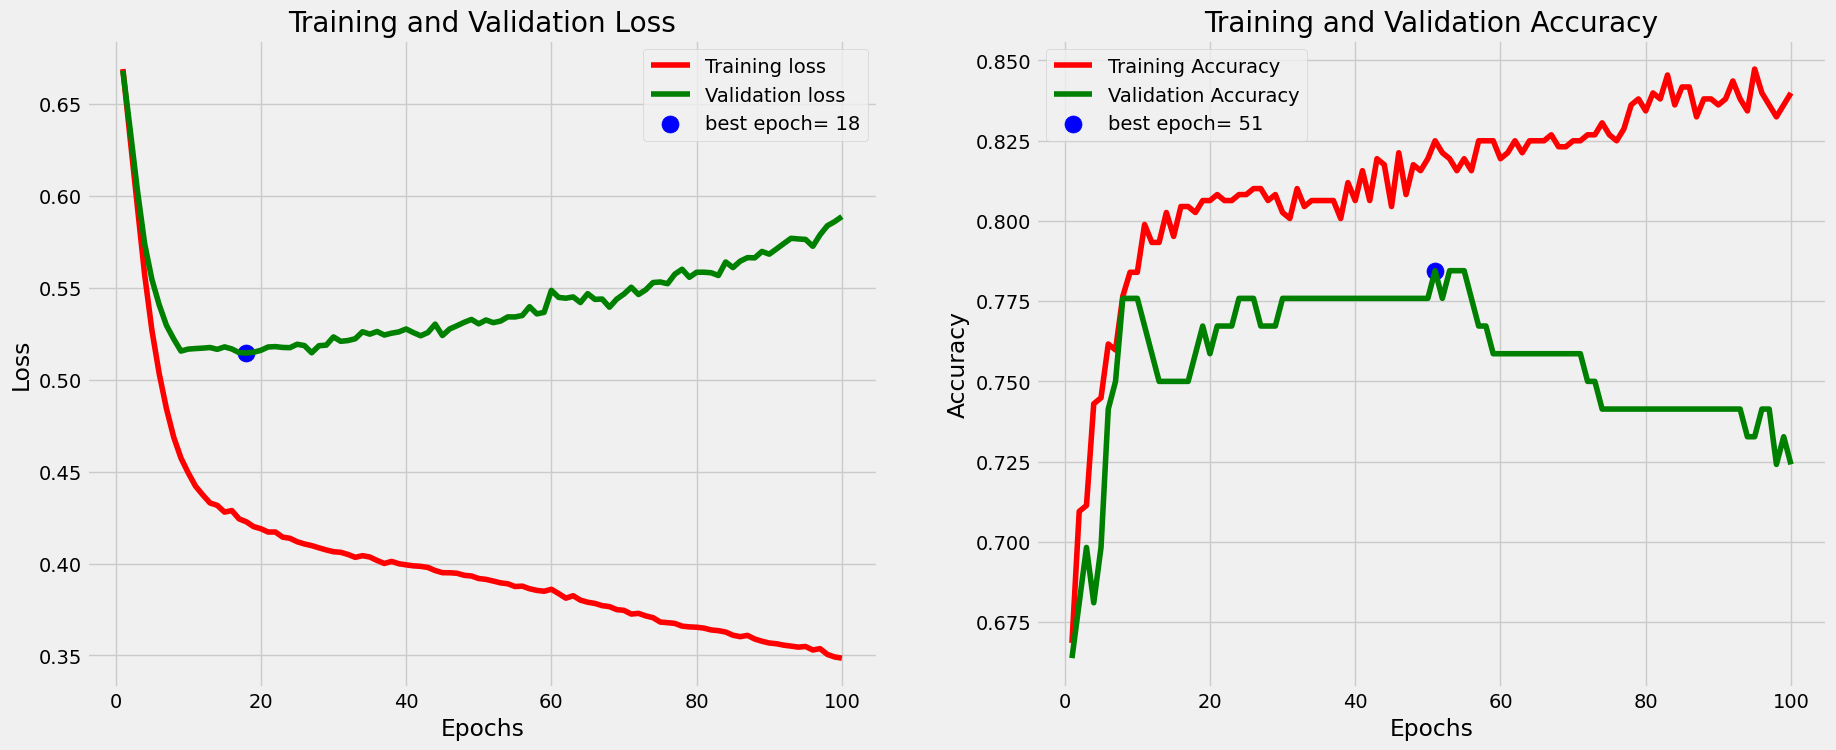

In [87]:
plot_history(history)

In [88]:
y_pred = model.predict(X_test_s)
y_pred = np.round(y_pred)
print(f"Accuracy: {np.round(accuracy_score(y_test,y_pred)*100,2)}%")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Accuracy: 73.04%


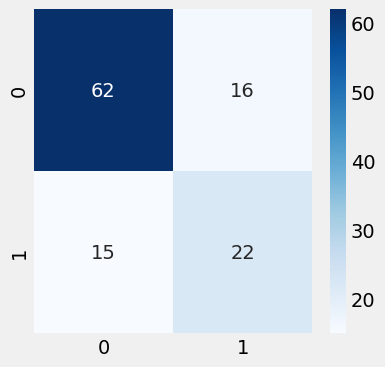

In [89]:
plt.figure(figsize=(4,4))
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, cmap='Blues')
plt.show()

In [90]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80        78
           1       0.58      0.59      0.59        37

    accuracy                           0.73       115
   macro avg       0.69      0.69      0.69       115
weighted avg       0.73      0.73      0.73       115



In [93]:
X = df_wo.drop('Outcome', axis=1)
y = df_wo['Outcome']
X_train_o, X_test_o, y_train_o, y_test_o = train_test_split(X, y, random_state=42, train_size=0.7)
X_test_o, X_val_o, y_test_o, y_val_o = train_test_split(X_test_o, y_test_o, random_state=42, train_size=0.5) 

In [94]:
X_train_os = scaler.fit_transform(X_train_o)
X_test_os = scaler.transform(X_test_o)
X_val_os = scaler.transform(X_val_o)

In [95]:
model = Sequential()
input = Input(shape=(8,))
model.add(input)
model.add(Dense(12, activation=aky_relu_layer))
model.add(Dense(8,activation=aky_relu_layer))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_33 (Dense)                     │ (None, 12)                  │             108 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 8)                   │             104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 221 (884.00 B)

 Trainable params: 221 (884.00 B)

 Non-trainable params: 0 (0.00 B)

In [96]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train_o,y_train_o,epochs=100,batch_size=8, validation_data=(X_val_o, y_val_o))

Epoch 1/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.4879 - loss: 1.6661 - val_accuracy: 0.5217 - val_loss: 0.9598
Epoch 2/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5318 - loss: 0.9397 - val_accuracy: 0.6261 - val_loss: 0.8130
Epoch 3/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6091 - loss: 0.7781 - val_accuracy: 0.6522 - val_loss: 0.7326
Epoch 4/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6317 - loss: 0.7411 - val_accuracy: 0.6609 - val_loss: 0.6936
Epoch 5/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6288 - loss: 0.6942 - val_accuracy: 0.6522 - val_loss: 0.6863
Epoch 6/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6471 - loss: 0.7003 - val_accuracy: 0.6609 - val_loss: 0.6636
Epoch 7/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6087 - loss: 0.6849 - val_accuracy: 0.6783 - val_loss: 0.6330
Epoch 8/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6702 - loss: 0.6194 - val_accuracy: 0.6870 - v

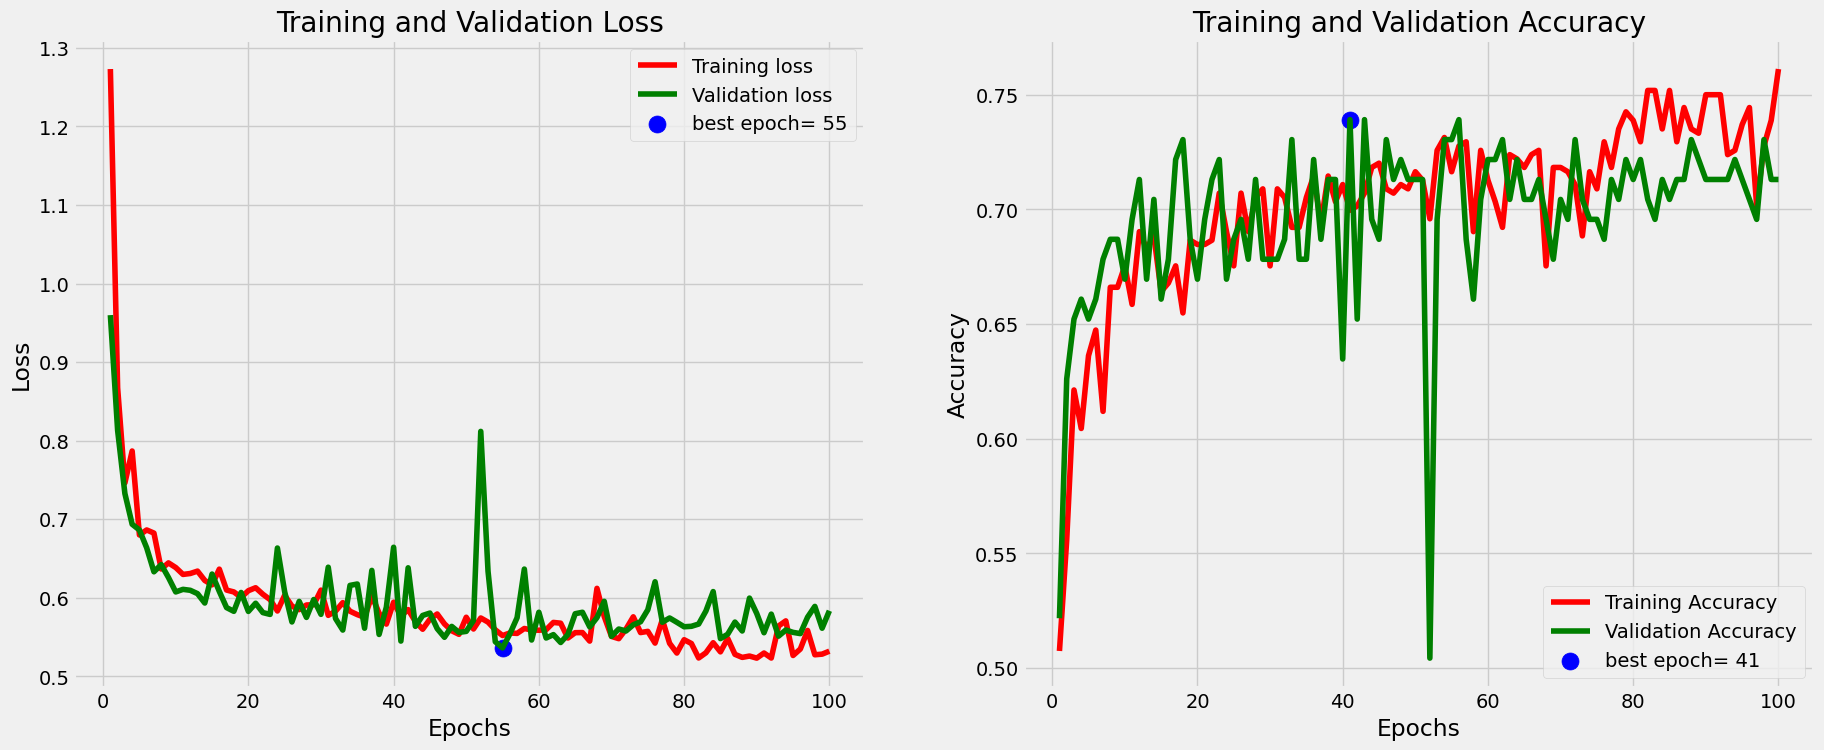

In [97]:
plot_history(history)

In [98]:
y_pred = model.predict(X_test_o)
y_pred = np.round(y_pred)
print(f"Accuracy: {np.round(accuracy_score(y_test,y_pred)*100,2)}%")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Accuracy: 55.65%


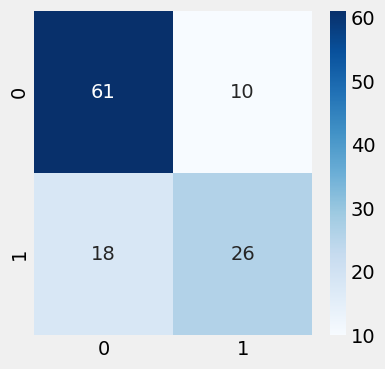

In [99]:
plt.figure(figsize=(4,4))
sns.heatmap(confusion_matrix(y_test_o,y_pred), annot=True, cmap='Blues')
plt.show()

In [100]:
print(classification_report(y_test_o,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.86      0.81        71
           1       0.72      0.59      0.65        44

    accuracy                           0.76       115
   macro avg       0.75      0.73      0.73       115
weighted avg       0.75      0.76      0.75       115



In [101]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train_os,y_train_o,epochs=100,batch_size=8, validation_data=(X_val_os, y_val_o))

Epoch 1/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6454 - loss: 0.8948 - val_accuracy: 0.6609 - val_loss: 0.7587
Epoch 2/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6766 - loss: 0.6852 - val_accuracy: 0.6609 - val_loss: 0.6626
Epoch 3/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6771 - loss: 0.6043 - val_accuracy: 0.6522 - val_loss: 0.6092
Epoch 4/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6325 - loss: 0.5987 - val_accuracy: 0.6348 - val_loss: 0.5855
Epoch 5/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7149 - loss: 0.5500 - val_accuracy: 0.6435 - val_loss: 0.5728
Epoch 6/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7055 - loss: 0.5480 - val_accuracy: 0.6870 - val_loss: 0.5646
Epoch 7/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7599 - loss: 0.4974 - val_accuracy: 0.6870 - val_loss: 0.5565
Epoch 8/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7757 - loss: 0.4984 - val_accuracy: 0.6957 - v

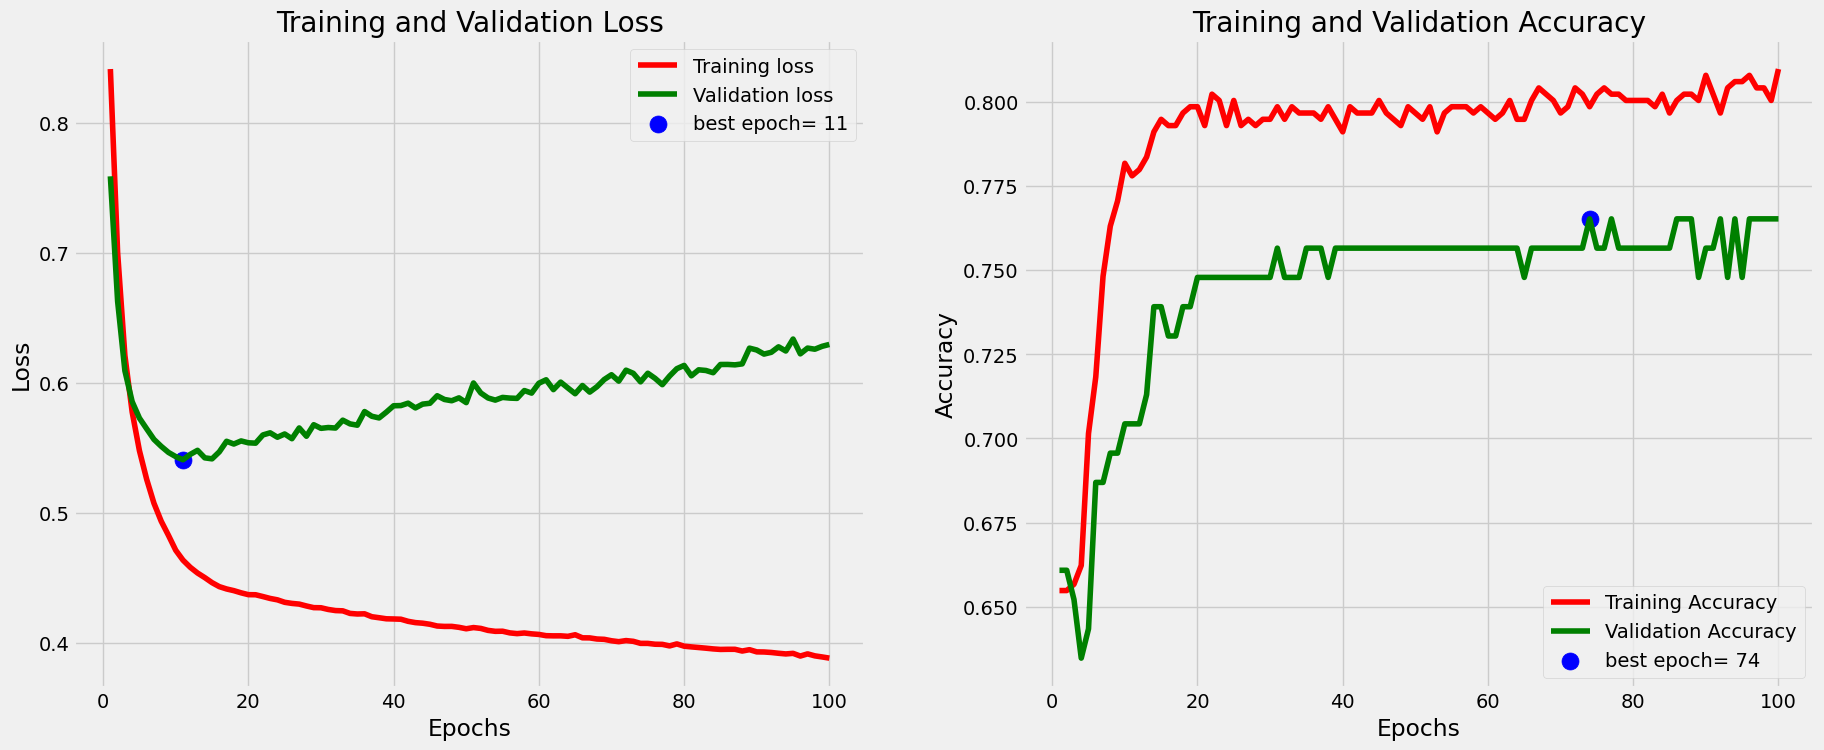

In [102]:
plot_history(history)

In [103]:
y_pred = model.predict(X_test_os)
y_pred = np.round(y_pred)
print(f"Accuracy: {np.round(accuracy_score(y_test,y_pred)*100,2)}%")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Accuracy: 59.13%


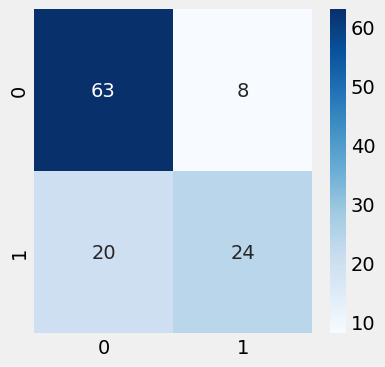

In [104]:
plt.figure(figsize=(4,4))
sns.heatmap(confusion_matrix(y_test_o,y_pred), annot=True, cmap='Blues')
plt.show()

In [105]:
print(classification_report(y_test_o,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.89      0.82        71
           1       0.75      0.55      0.63        44

    accuracy                           0.76       115
   macro avg       0.75      0.72      0.72       115
weighted avg       0.76      0.76      0.75       115



In [35]:
from sklearn.feature_selection import RFE, SelectKBest,chi2

In [37]:
X = df_wo.drop('Outcome', axis=1)
y = df_wo['Outcome']
X_train_o, X_test_o, y_train_o, y_test_o = train_test_split(X, y, random_state=42, train_size=0.7)
X_test_o, X_val_o, y_test_o, y_val_o = train_test_split(X_test_o, y_test_o, random_state=42, train_size=0.5) 

In [54]:
bestfeatures = SelectKBest(score_func=chi2, k=8)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']
featureScores

,Specs,Score
0,Pregnancies,112.750296
1,Glucose,1416.070285
2,BloodPressure,15.933350
3,SkinThickness,52.469086
4,Insulin,2147.614662
5,BMI,125.801966
6,DiabetesPedigreeFunction,5.468140
7,Age,193.090900


In [41]:
featureScores.nlargest(8,'Score')['Specs']

4                     Insulin
1                     Glucose
7                         Age
5                         BMI
0                 Pregnancies
3               SkinThickness
2               BloodPressure
6    DiabetesPedigreeFunction
Name: Specs, dtype: object

In [42]:
featureScores.nlargest(6,'Score')['Specs']

4          Insulin
1          Glucose
7              Age
5              BMI
0      Pregnancies
3    SkinThickness
Name: Specs, dtype: object

In [43]:
featureScores.nlargest(4,'Score')['Specs']

4    Insulin
1    Glucose
7        Age
5        BMI
Name: Specs, dtype: object

In [44]:
featureScores.nlargest(2,'Score')['Specs']

4    Insulin
1    Glucose
Name: Specs, dtype: object

In [45]:
from time import time

In [79]:
def evaluate_model(X_train,y_train,X_test,y_test,X_val,y_val,n):
    st = time()
    model = Sequential()
    input = Input(shape=(n,))
    model.add(input)
    model.add(Dense(int(3*n/2), activation='relu'))
    model.add(Dense(n,activation='relu'))
    model.add(Dense(1,activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    history = model.fit(X_train,y_train,epochs=50,batch_size=32, validation_data=(X_val, y_val))
    et = time()
    y_pred = model.predict(X_test)
    y_pred = np.round(y_pred)
    ac = np.round(accuracy_score(y_test,y_pred)*100,2)
    print(f"Accuracy: {ac}%")
    t = et-st
    print(f"Training Time: {t} Seconds")
    print(classification_report(y_test_o,y_pred))
    plt.figure(figsize=(3,3))
    sns.heatmap(confusion_matrix(y_test_o,y_pred), annot=True, cmap='Blues')
    plt.show()
    return model,history,ac,t

In [85]:
def evaluate_model2(X_train,y_train,X_test,y_test,X_val,y_val,n):
    st = time()
    model = Sequential()
    input = Input(shape=(n,))
    model.add(input)
    model.add(Dense(int(12), activation='relu'))
    model.add(Dense(8,activation='relu'))
    model.add(Dense(1,activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    history = model.fit(X_train,y_train,epochs=50,batch_size=32, validation_data=(X_val, y_val))
    et = time()
    y_pred = model.predict(X_test)
    y_pred = np.round(y_pred)
    ac = np.round(accuracy_score(y_test,y_pred)*100,2)
    print(f"Accuracy: {ac}%")
    t = et-st
    print(f"Training Time: {t} Seconds")
    print(classification_report(y_test,y_pred))
    plt.figure(figsize=(3,3))
    sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, cmap='Blues')
    plt.show()
    return model,history,ac,t

In [80]:
def feature_selection(n_features,df):
    X = df_wo[featureScores.nlargest(n_features,'Score')['Specs']]
    y = df_wo['Outcome']
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, train_size=0.7)
    X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, random_state=42, train_size=0.5) 
    evaluate_model(X_train,y_train,X_test,y_test,X_val, y_val, n = n_features)

In [86]:
def feature_selection2(n_features,df):
    X = df_wo[featureScores.nlargest(n_features,'Score')['Specs']]
    y = df_wo['Outcome']
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, train_size=0.7)
    X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, random_state=42, train_size=0.5) 
    evaluate_model2(X_train,y_train,X_test,y_test,X_val, y_val, n = n_features)

Epoch 1/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.6501 - loss: 10.1204 - val_accuracy: 0.6609 - val_loss: 5.8106
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6495 - loss: 5.3718 - val_accuracy: 0.6000 - val_loss: 2.8800
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5964 - loss: 3.0683 - val_accuracy: 0.6348 - val_loss: 1.8989
Epoch 4/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5943 - loss: 2.0541 - val_accuracy: 0.5652 - val_loss: 1.2374
Epoch 5/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5531 - loss: 1.2550 - val_accuracy: 0.5478 - val_loss: 1.1858
Epoch 6/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6057 - loss: 1.0972 - val_accuracy: 0.5913 - val_loss: 1.0593
Epoch 7/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6083 - loss: 0.9462 - val_accuracy: 0.6000 - val_loss: 0.9851
Epoch 8/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6058 - loss: 0.9129 - val_accuracy: 0.6261 - val_los

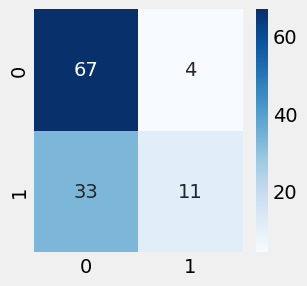

In [81]:
feature_selection(8,df)

Epoch 1/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.6262 - loss: 13.3204 - val_accuracy: 0.6609 - val_loss: 8.8124
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6477 - loss: 8.4220 - val_accuracy: 0.6696 - val_loss: 4.5590
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6406 - loss: 3.6211 - val_accuracy: 0.5217 - val_loss: 2.5156
Epoch 4/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5701 - loss: 2.1636 - val_accuracy: 0.4870 - val_loss: 1.8784
Epoch 5/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5339 - loss: 1.7756 - val_accuracy: 0.5304 - val_loss: 1.2782
Epoch 6/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5890 - loss: 1.1573 - val_accuracy: 0.5565 - val_loss: 1.0081
Epoch 7/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5833 - loss: 1.2401 - val_accuracy: 0.6261 - val_loss: 0.9230
Epoch 8/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5552 - loss: 1.0785 - val_accuracy: 0.5826 - val_los

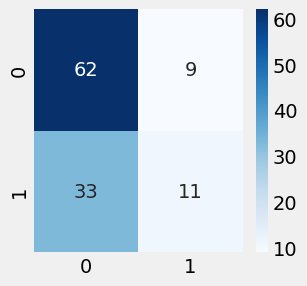

In [82]:
feature_selection(6,df)

Epoch 1/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - accuracy: 0.6370 - loss: 4.7323 - val_accuracy: 0.6609 - val_loss: 2.7815
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6558 - loss: 3.1103 - val_accuracy: 0.6609 - val_loss: 1.5347
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6552 - loss: 1.6329 - val_accuracy: 0.6261 - val_loss: 0.7724
Epoch 4/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6021 - loss: 0.9032 - val_accuracy: 0.3304 - val_loss: 0.7608
Epoch 5/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3844 - loss: 0.7670 - val_accuracy: 0.6000 - val_loss: 0.7469
Epoch 6/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6308 - loss: 0.7622 - val_accuracy: 0.6087 - val_loss: 0.7188
Epoch 7/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5983 - loss: 0.7590 - val_accuracy: 0.6087 - val_loss: 0.7071
Epoch 8/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6333 - loss: 0.7472 - val_accuracy: 0.6261 - val_loss

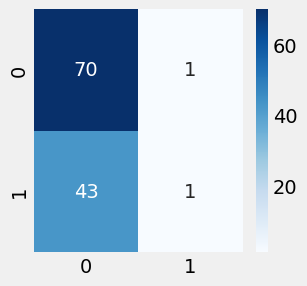

In [83]:
feature_selection(4,df)

Epoch 1/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.4804 - loss: 9.0967 - val_accuracy: 0.5304 - val_loss: 11.4054
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5171 - loss: 7.7397 - val_accuracy: 0.5304 - val_loss: 10.3803
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5133 - loss: 6.2252 - val_accuracy: 0.5478 - val_loss: 9.4513
Epoch 4/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5350 - loss: 6.3836 - val_accuracy: 0.5478 - val_loss: 8.5854
Epoch 5/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5325 - loss: 6.7503 - val_accuracy: 0.5565 - val_loss: 7.8070
Epoch 6/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5435 - loss: 5.2187 - val_accuracy: 0.5652 - val_loss: 7.1278
Epoch 7/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5407 - loss: 4.0053 - val_accuracy: 0.5652 - val_loss: 6.5443
Epoch 8/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5762 - loss: 4.1319 - val_accuracy: 0.5739 - val_lo

C:\Users\YASH PATEL\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\YASH PATEL\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\YASH PATEL\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.

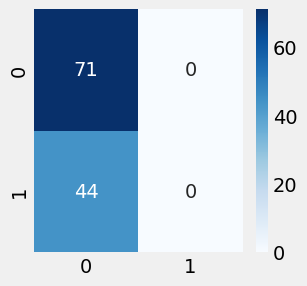

In [84]:
feature_selection(2,df)

Epoch 1/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.4215 - loss: 5.2563 - val_accuracy: 0.5826 - val_loss: 2.7650
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6309 - loss: 1.8708 - val_accuracy: 0.5913 - val_loss: 1.7671
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5766 - loss: 1.5578 - val_accuracy: 0.6696 - val_loss: 1.4327
Epoch 4/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6324 - loss: 1.2068 - val_accuracy: 0.5391 - val_loss: 1.1360
Epoch 5/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6450 - loss: 0.7964 - val_accuracy: 0.6435 - val_loss: 0.9949
Epoch 6/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6242 - loss: 0.9011 - val_accuracy: 0.6348 - val_loss: 0.9032
Epoch 7/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6454 - loss: 0.7694 - val_accuracy: 0.6522 - val_loss: 0.8629
Epoch 8/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6717 - loss: 0.7124 - val_accuracy: 0.6348 - val_loss

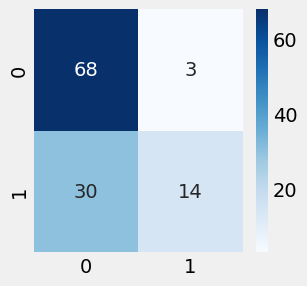

In [94]:
feature_selection2(8,df)

Epoch 1/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.3692 - loss: 7.0407 - val_accuracy: 0.4348 - val_loss: 2.7740
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4788 - loss: 2.4450 - val_accuracy: 0.6000 - val_loss: 1.6807
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5995 - loss: 1.4343 - val_accuracy: 0.5913 - val_loss: 1.2499
Epoch 4/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5837 - loss: 1.1442 - val_accuracy: 0.6435 - val_loss: 1.0427
Epoch 5/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6064 - loss: 1.0296 - val_accuracy: 0.5913 - val_loss: 0.9717
Epoch 6/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5773 - loss: 0.9259 - val_accuracy: 0.5739 - val_loss: 0.8781
Epoch 7/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6023 - loss: 0.8948 - val_accuracy: 0.5652 - val_loss: 0.8807
Epoch 8/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5473 - loss: 0.8331 - val_accuracy: 0.5913 - val_loss

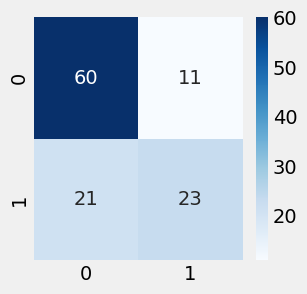

In [93]:
feature_selection2(6,df)

Epoch 1/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.4266 - loss: 3.3888 - val_accuracy: 0.4696 - val_loss: 1.8550
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4528 - loss: 1.8238 - val_accuracy: 0.6174 - val_loss: 0.8999
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6270 - loss: 1.0152 - val_accuracy: 0.6174 - val_loss: 0.7897
Epoch 4/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5601 - loss: 0.8537 - val_accuracy: 0.6087 - val_loss: 0.8651
Epoch 5/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6041 - loss: 0.8303 - val_accuracy: 0.6261 - val_loss: 0.7772
Epoch 6/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5687 - loss: 0.8511 - val_accuracy: 0.6261 - val_loss: 0.8162
Epoch 7/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5569 - loss: 0.8653 - val_accuracy: 0.6696 - val_loss: 0.7547
Epoch 8/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6285 - loss: 0.7940 - val_accuracy: 0.6522 - val_los

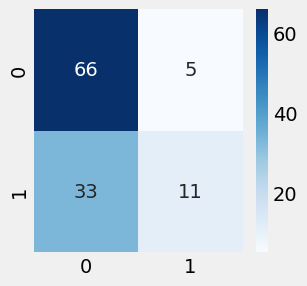

In [92]:
feature_selection2(4,df)

Epoch 1/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.6733 - loss: 11.0226 - val_accuracy: 0.5826 - val_loss: 6.6715
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5131 - loss: 5.6373 - val_accuracy: 0.5913 - val_loss: 1.9187
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5173 - loss: 1.2713 - val_accuracy: 0.5739 - val_loss: 0.9701
Epoch 4/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4783 - loss: 0.9959 - val_accuracy: 0.6087 - val_loss: 0.8160
Epoch 5/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5990 - loss: 0.7720 - val_accuracy: 0.6261 - val_loss: 0.7319
Epoch 6/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5806 - loss: 0.7294 - val_accuracy: 0.6435 - val_loss: 0.6842
Epoch 7/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5228 - loss: 0.7285 - val_accuracy: 0.6348 - val_loss: 0.6734
Epoch 8/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5159 - loss: 0.7135 - val_accuracy: 0.6261 - val_los

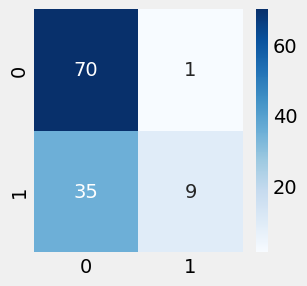

In [91]:
feature_selection2(2,df)

In [114]:
def create_model():
    model = Sequential()
    model.add(Dense(12, activation='relu', input_dim=8))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [112]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [108]:
folds = KFold(n_splits = 5, shuffle = True, random_state = 42)

In [115]:
model = create_model()
history = model.fit(X_train, y_train, epochs=1)

accuracies = cross_val_score(estimator=model, scoring="accuracy", X=X_train, y=y_train, cv=5)

print(accuracies)

C:\Users\YASH PATEL\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6161 - loss: 9.3187


TypeError: Cannot clone object '<Sequential name=sequential_29, built=True>' (type <class 'keras.src.models.sequential.Sequential'>): it does not seem to be a scikit-learn estimator as it does not implement a 'get_params' method.